## Multiple Linear Regression with a decision trees

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz 

from sklearn import tree, datasets, metrics, model_selection

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

print('train samples:', len(X_train))
print('test samples', len(X_test))

train samples: 354
test samples 152


In [5]:
model = tree.DecisionTreeRegressor(max_depth=4, criterion='mse')
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

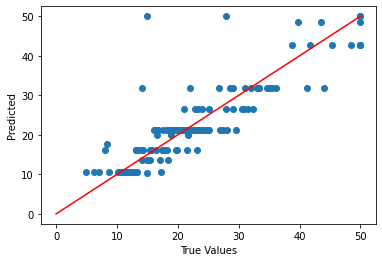

In [6]:
predicted = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
_ = ax.plot([0, y.max()], [0, y.max()], ls='-', color='red')

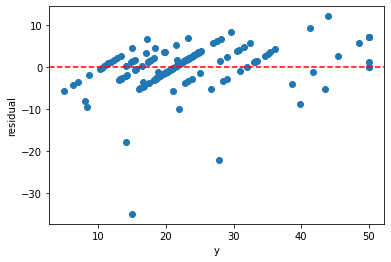

In [7]:
residual = y_test - predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residual)
ax.set_xlabel('y')
ax.set_ylabel('residual')

_ = plt.axhline(0, color='red', ls='--')

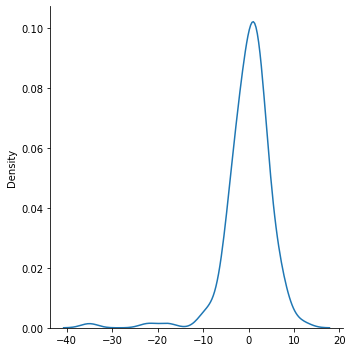

In [8]:
sns.displot(residual, kind="kde");

In [9]:
print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))

r2 score: 0.7143960003550247
mse: 26.49427852604092
rmse: 5.147259321817866


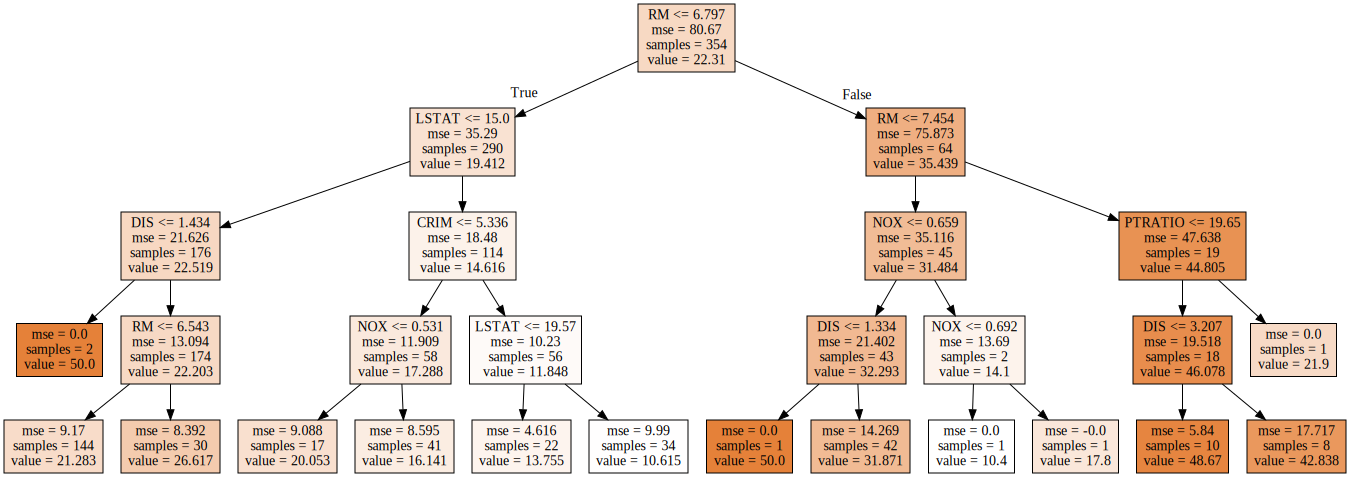

In [10]:
from IPython.display import display

graph = graphviz.Source(tree.export_graphviz(model, out_file=None, feature_names=boston.feature_names, filled = True))
display(graph)